In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('experiments_csv.csv')
df.head()

,FSP,TC,TA,TP
0,1,0.3,0.90,0.62
1,2,0.7,0.69,0.74
2,3,0.8,0.87,0.80
3,4,0.2,0.50,0.90
4,5,0.7,0.72,0.80


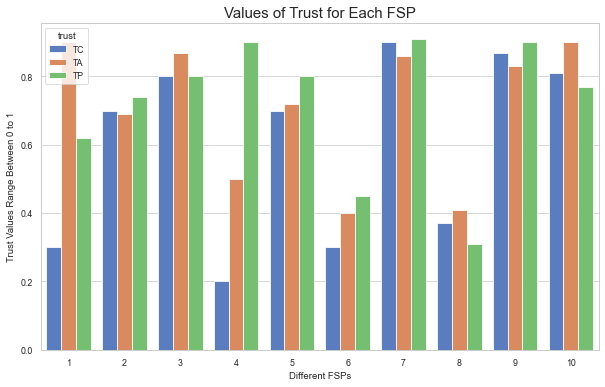

In [3]:
df_melt = pd.melt(df, id_vars="FSP", var_name="trust", value_name="Value")
sns.set_context('paper')
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='FSP', y='Value', data=df_melt, hue='trust', ci=None, palette="muted",orient='v', )
ax.set_title("Values of Trust for Each FSP", fontsize=15)
ax.set_xlabel ("Different FSPs")
ax.set_ylabel ("Trust Values Range Between 0 to 1")
bar.savefig("trust_value_new.png")
plt.show()

In [4]:
df['var']=df.iloc[:,1:4].var(axis=1)
df.head()

,FSP,TC,TA,TP,var
0,1,0.3,0.90,0.62,0.090133
1,2,0.7,0.69,0.74,0.000700
2,3,0.8,0.87,0.80,0.001633
3,4,0.2,0.50,0.90,0.123333
4,5,0.7,0.72,0.80,0.002800


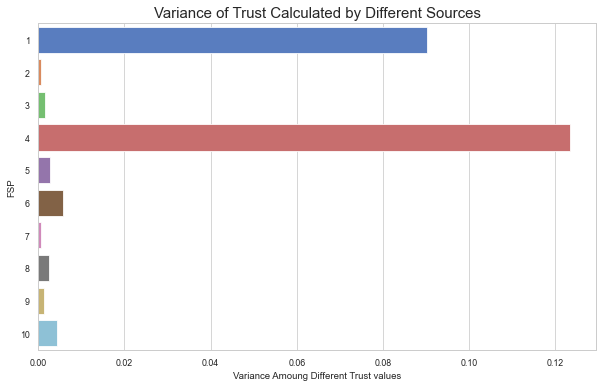

In [5]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="var", y="FSP", data=df, ci=None, palette="muted",orient='h' )
ax.set_title("Variance of Trust Calculated by Different Sources", fontsize=15)
ax.set_ylabel ("FSP")
ax.set_xlabel ("Variance Amoung Different Trust values")
bar.savefig("var_new.png")

In [6]:
del(df['var'])

In [7]:
df.head()

,FSP,TC,TA,TP
0,1,0.3,0.90,0.62
1,2,0.7,0.69,0.74
2,3,0.8,0.87,0.80
3,4,0.2,0.50,0.90
4,5,0.7,0.72,0.80


In [8]:
df["w_tf"]=(df['TC']*0.6)+(df['TA']*0.2)+(df["TP"]*0.2)
df["trust"]=None
df.head()

,FSP,TC,TA,TP,w_tf,trust
0,1,0.3,0.90,0.62,0.484,None
1,2,0.7,0.69,0.74,0.706,None
2,3,0.8,0.87,0.80,0.814,None
3,4,0.2,0.50,0.90,0.400,None
4,5,0.7,0.72,0.80,0.724,None


In [9]:
for i in range (0,10):
    if df.iloc[i,4] >0.90:
        df.iloc[i,5]="High Trust"
    elif df.iloc[i,4] >0.80:
        df.iloc[i,5]="Above Average Trust"
    elif df.iloc[i,4] >0.70:
        df.iloc[i,5]="Average Trust"
    elif df.iloc[i,4] >0.50:
        df.iloc[i,5]="Below Average Trust"
    elif df.iloc[i,4] <.50:
        df.iloc[i,5]="Low Trust"
df['var']=df.iloc[:,1:4].var(axis=1)
df.head()

,FSP,TC,TA,TP,w_tf,trust,var
0,1,0.3,0.90,0.62,0.484,Low Trust,0.090133
1,2,0.7,0.69,0.74,0.706,Average Trust,0.000700
2,3,0.8,0.87,0.80,0.814,Above Average Trust,0.001633
3,4,0.2,0.50,0.90,0.400,Low Trust,0.123333
4,5,0.7,0.72,0.80,0.724,Average Trust,0.002800


In [10]:
#groupby the data by delivery type
data = df.groupby("trust")["FSP"].count()
data

trust
Above Average Trust    4
Average Trust          2
Low Trust              4
Name: FSP, dtype: int64

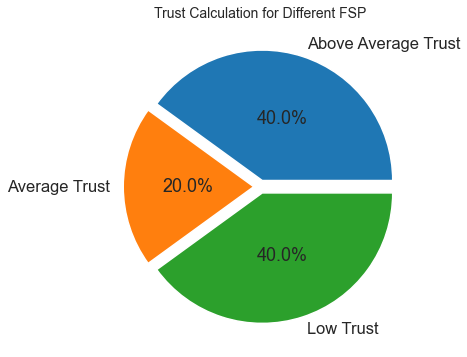

In [11]:
sns.set_context("talk")
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Trust Calculation for Different FSP", fontsize=14)
pie.savefig("trust_pie_chrt.png")

In [12]:
df.to_csv('final.csv')